# Selección de atributos
<font size=4>
La selección de atributos, o feature selection, puede llevarse a cabo mediante diferentes técnicas. De forma general, se encarga de identificar y eliminar aquellos atributos que son, o bien redundantes, o que no aportan mucha información para la clasificación o predicción en un conjunto de datos. La idea detrás de esto es, en primera, que se reduzca la dimensión del conjunto de datos y por lo tanto la complejidad de procesamiento, y segundo,que se preserven sólo aquellos atributos con mayor información discriminativa y que, por lo tanto, benefician la predicción.
<br><br>
<center><img src="https://i.postimg.cc/cJhzvNp0/imagen-2021-06-17-084523.png" width="80%" alt="Feature selection">
<br><b>Figura 1.</b> Feature Selection<br>
</center>
<br><br>
De forma particular, los métodos de feature selection se aplican (sin limitarse a ello) a conjuntos de datos altamente dimensionales, como pueden ser datos de microarreglos. Estos últimos se representan como una estructura altamente dimensional con pocas muestras o patrones, y muchas (típicamente miles) de genes o atributos que representan una expresión génica.


## Tipos de selección de atributos
<font size=4>
De acuerdo con la forma en que se llevan a cabo, los métodos de feature selection se dividen en tres grupos:

*   Métodos *filter*
<font size=4><br>
Se enfocan principalmente en la identificación de los atributos más relevantes, a partir de una evaluación individual de todos ellos. Se obtiene un puntaje para cada feature y el usuario se encarga de elegir cuáles atributos permanecen.
La idea más simple para estos métodos es tomar la correlación de Pearson entre cada atributo con la clase; aquellos atributos más correlacionados con el vector de clases serán los que aporten mayor información discriminativa. Por otro lado, aquellos atributos correlacionados entre sí tienen una dependencia lineal y por lo tanto tienen el mismo efecto en la clasificación por lo que puede conservarse sólo uno de ellos.
<br><br>
Además de la correlación, también se utilizan pruebas de significancia estadística para determinar cuáles atributos son más relevantes. Es decir, se evalúan los datos de cada atributo mediante una prueba estadística de Wilcoxon para determinar en cuál de ellos existe una diferencia estadísticamente significativa entre los datos de una clase vs la otra. Es evidente que aquellos atributos cuyos valores por clase poseen mayores diferencias entre sí son más deseables.
También se usan otras medidas para este propóstio, tales como información mutua, entropía, entre otros.
<br><br>
*   Métodos *wrapper*
<font size=4><br>
A diferencia de los filter, los métodos wrapper evalúan subconjuntos de atributos en el dataset, y además se toma en cuenta el resultado de un algoritmo de predicción para realizar dicha evaluación.
Lo que se debe precisar aquí es una heurística que permita establecer una metodología de cómo ir eligiendo los subconjuntos de atributos a evaluar.
<br><br>
Una ventaja de los wrappers es que ofrecen, en general, mejores resultados de clasificación; la desventaja es que requiere un mayor costo computacional.
<br><br>
*   Métodos *embebidos*
<font size=4><br>
En este tipo de métodos, la selección se realiza dentro del algoritmo de aprendizaje. Es decir la selección de atributos es un proceso inherente a la construcción del algoritmo, por ejemplo, cuando en el algoritmo se lleva a cabo una regularización. Este método depende específicamente de la forma en cómo opera el algoritmo de aprendizaje y, en general, ofrece menor costo computacional que los wrapper.







### Ejemplo de un método filter

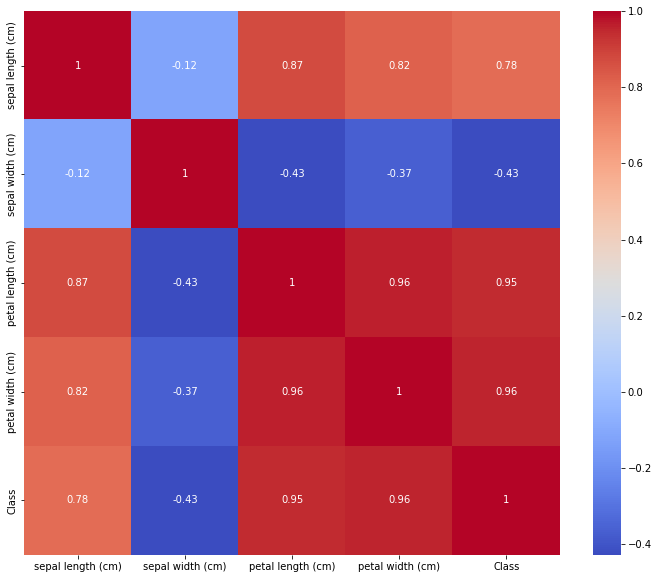

Features:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'Class']

Seleccionados
sepal length (cm)    0.782561
petal length (cm)    0.949035
petal width (cm)     0.956547
Class                1.000000
Name: Class, dtype: float64

Identificar correlación entre atributos:
                   sepal length (cm)  petal length (cm)
sepal length (cm)           1.000000           0.871754
petal length (cm)           0.871754           1.000000
                   sepal length (cm)  petal width (cm)
sepal length (cm)           1.000000          0.817941
petal width (cm)            0.817941          1.000000
                   petal length (cm)  petal width (cm)
petal length (cm)           1.000000          0.962865
petal width (cm)            0.962865          1.000000


In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Obtener los datos
x = load_iris()
df = pd.DataFrame(x.data, columns = x.feature_names)
X = df.copy() #Los datos
df["Class"] = x.target
y = df["Class"] #La clase
df.head()

# Obtener la correlación de Pearson
# Mostrar heatmap
plt.figure(figsize=(12,10))
cor = df.corr(method='pearson')
sns.heatmap(cor, annot=True, cmap=plt.cm.coolwarm)
plt.show()

# Tomar la correlación con el vector de clases
cor_target = abs(cor["Class"])
# Seleccionar los atributos con mayor correlación
relevant_features = cor_target[cor_target>0.5]
print('Features:')
print(list(df.columns))
print('\nSeleccionados')
print(relevant_features)

# Identificar correlación entre atributos
print('\nIdentificar correlación entre atributos:')
print(df[["sepal length (cm)","petal length (cm)"]].corr())
print(df[["sepal length (cm)","petal width (cm)"]].corr())
print(df[["petal length (cm)","petal width (cm)"]].corr())

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

# Obtener los datos
x = load_iris()
df = pd.DataFrame(x.data, columns = x.feature_names)
X = df.copy() #Los datos
df["Class"] = x.target
y = df["Class"] #La clase

mdl = RandomForestClassifier()
features = (['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'],
            ['sepal length (cm)', 'petal length (cm)', 'petal width (cm)'],
            ['petal length (cm)', 'petal width (cm)'],
            ['sepal length (cm)', 'petal width (cm)'],
            ['sepal length (cm)', 'petal length (cm)'],
            ['petal length (cm)'],
            ['petal width (cm)'])
feat_description = ['Todos los atributos (los 4)',
                    'Los tres con mayor correlación con la clase',
                    'Los dos con mejor correlación con la clase',
                    'Eliminando uno de los con mayor correlación entre ellos',
                    'Eliminar el otro con mayor correlación entre ellos',
                    'Sólo uno de los dos con mayor correlación con la clase',
                    'Sólo el otro de los 2 con mayor correlación con la clase']

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, stratify=y, test_size=0.3, random_state=39)

scores = list()
for feature,d in zip(features, feat_description):
    del(mdl)
    # mdl = RandomForestClassifier()
    # mdl = AdaBoostClassifier()
    # mdl = KNeighborsClassifier()
    mdl = GaussianNB()
    # mdl = MLPClassifier()
    # mdl = SVC()
    mdl.fit(X_train[feature], y_train)
    print('\nResultados')
    print(mdl.score(X_test[feature], y_test), d)
    scores.append(mdl.score(X_test[feature], y_test))
max_score = np.argmax(scores)
print('\n',scores)
print(features[max_score], feat_description[max_score])




Resultados
0.9555555555555556 Todos los atributos (los 4)

Resultados
0.9555555555555556 Los tres con mayor correlación con la clase

Resultados
0.9555555555555556 Los dos con mejor correlación con la clase

Resultados
0.9777777777777777 Eliminando uno de los con mayor correlación entre ellos

Resultados
0.8888888888888888 Eliminar el otro con mayor correlación entre ellos

Resultados
0.9333333333333333 Sólo uno de los dos con mayor correlación con la clase

Resultados
0.9777777777777777 Sólo el otro de los 2 con mayor correlación con la clase

 [0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9777777777777777, 0.8888888888888888, 0.9333333333333333, 0.9777777777777777]
['sepal length (cm)', 'petal width (cm)'] Eliminando uno de los con mayor correlación entre ellos


### Ejemplo de un método wrapper

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

# Obtener los datos
x = load_iris()
df = pd.DataFrame(x.data, columns = x.feature_names)
X = df.copy() #Los datos
df["Class"] = x.target
y = df["Class"] #La clase

f = x.feature_names
n_feat = len(f)
print('Features:', n_feat)

mdl = RandomForestClassifier()

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

X_train, X_test = np.array(X_train), np.array(X_test)
y_train, y_test = np.array(y_train), np.array(y_test)

best_score = 0
best_subset = list()

for i in range(n_feat):
    aux_subset = list()
    aux_subset.append(i)
    Xtr = X_train[:, i]
    Xts = X_test[:, i]
    if len(Xtr.shape)==1:
        Xtr = Xtr.reshape(-1,1)
        Xts = Xts.reshape(-1,1)
    del(mdl)
    # mdl = RandomForestClassifier()
    # mdl = AdaBoostClassifier()
    # mdl = KNeighborsClassifier()
    mdl = GaussianNB()
    # mdl = MLPClassifier()
    # mdl = SVC()
    mdl.fit(Xtr, y_train)
    aux_score = mdl.score(Xts, y_test)

    if aux_score >= best_score:
        best_score = aux_score
        best_subset = aux_subset

    print('\nSubset actual:', aux_subset)
    print('Score actual:', aux_score)
    print('Mejor subset:', best_subset)
    print('Mejor score:', best_score)

    for j in range(i+1, n_feat):
        aux_subset.append(j)
        Xtr = X_train[:, aux_subset]
        Xts = X_test[:, aux_subset]
        del(mdl)
        # mdl = RandomForestClassifier()
        # mdl = AdaBoostClassifier()
        # mdl = KNeighborsClassifier()
        mdl = GaussianNB()
        # mdl = MLPClassifier()
        # mdl = SVC()
        mdl.fit(Xtr, y_train)
        aux_score = mdl.score(Xts, y_test)

        if aux_score >= best_score:
            best_score = aux_score
            best_subset = aux_subset

        print('\nSubset actual:', aux_subset)
        print('Score actual:', aux_score)
        print('Mejor subset:', best_subset)
        print('Mejor score:', best_score)

print('\n\nMejores atributos para este clasificador:')
for feature in best_subset:
    print(x.feature_names[feature])



Features: 4

Subset actual: [0]
Score actual: 0.6666666666666666
Mejor subset: [0]
Mejor score: 0.6666666666666666

Subset actual: [0, 1]
Score actual: 0.6888888888888889
Mejor subset: [0, 1]
Mejor score: 0.6888888888888889

Subset actual: [0, 1, 2]
Score actual: 0.8888888888888888
Mejor subset: [0, 1, 2]
Mejor score: 0.8888888888888888

Subset actual: [0, 1, 2, 3]
Score actual: 0.9111111111111111
Mejor subset: [0, 1, 2, 3]
Mejor score: 0.9111111111111111

Subset actual: [1]
Score actual: 0.5777777777777777
Mejor subset: [0, 1, 2, 3]
Mejor score: 0.9111111111111111

Subset actual: [1, 2]
Score actual: 0.9111111111111111
Mejor subset: [1, 2]
Mejor score: 0.9111111111111111

Subset actual: [1, 2, 3]
Score actual: 0.9111111111111111
Mejor subset: [1, 2, 3]
Mejor score: 0.9111111111111111

Subset actual: [2]
Score actual: 0.9111111111111111
Mejor subset: [2]
Mejor score: 0.9111111111111111

Subset actual: [2, 3]
Score actual: 0.9333333333333333
Mejor subset: [2, 3]
Mejor score: 0.933333333